# Problems Notebook for Applied Statistics 2025
The notebook summarizes my journey towards solving four problems set as part of the Applied Statistics module in the HDip in Computer Science and Data Analytics. The problems are:

1. Extending the Lady Tasting Tea Experiment
2. Normal distribution
3. t-Tests
4. ANOVA
 
## Standard packages used across the problems




`ipython`(https://ipython.org/)



`Numpy` is the standard package used for scientific computing in Python ([see the manual](https://numpy.org/doc/2.3/)). Numpy makes it easier to work with your data using [arrays](https://numpy.org/doc/2.3/user/absolute_beginners.html) to handle and understand your data.



`scipy`

`statsmodels`

`matplotlib` is a commmonly used package for creating visualisations of data in Python(https://matplotlib.org/stable/index.html). Visualisation of the data 

In [ ]:
import matplotlib.pyplot as plt

`pandas`enables to the analysis and manipualtion of data (https://pandas.pydata.org/docs/). It is commonly used for working with tabular data.


In [ ]:
import pandas as pd

`seaborn`


In [ ]:
import seaborn as sns

`sympy`
`nose`
`scikit-learn`
`qiskit[visualization]`
`yfinance`

In [ ]:
# Import the numpy library
import numpy as np

## Problem 1: Extending the Lady Tasting Tea
Firstly, what is the the Lady Tasting Tea Problem. This comes from the "Design of Experiments" by Ronald A fisher and states a lady can work out from tasting a cup of tea she can tell if the milk was added to the cup first or after the tea. The experiment he designed was to create eight cups of tea, half made milk first and half made tea first, and presenting them in a random order to the taster. the taster has the experiment explained so knows that four are made milk first and four are tea first. 

the null hypothesis is that she can't tell the difference between the tea making methods. There is a good explanation of [null hypothesis here](https://www.geeksforgeeks.org/maths/null-hypothesis/) if this concept is new to you. This iteration of the experiment will extend the number of cups of tea to twelve with eight made tea-first and four made milk-first.

### Import the needed tools
To complete this task we are going to need to use some mathematical functions so import `math`. Documentation about `math` is available at [https://docs.python.org/3/library/math.html](https://docs.python.org/3/library/math.html). We will also use `intertools` to [create iterator blocks](https://docs.python.org/3/library/itertools.html#module-itertools). 

In [36]:
# Mathematical functions from the math module
# https://docs.python.org/3/library/math.html
import math

# Combinatorial functions from the itertools module
import itertools

# Random number generation functions from the random module
import random

# Numerical structures and functions from the numpy module
import numpy as np

# Plotting functions from the matplotlib module
import matplotlib.pyplot as plt

### Permutations and combinations
Permutations are the different ways the elements can be ordered. For example, your colleague has told you the combination for the lock on the stationery cupboard, you remember the digits are 1, 5, 7, 9, but not the order. None of the digits were repeated. The different orders of these digits are the permutations eg 1579, 1597, 9715...... The number of different ways of ordering these permutations is four factorial, often written as 4!. This is calculated by 4 * 3 * 2 * 1 = 24. It's going to take a while to get that stationery!

Combinations is a selection of a number of elements from the set. The order does not matter and the same element cannot be selected twice. If we take our stationery cuboard lock again adn all we know if no digit is repeated in the code, the how many combinations so we have? 1234, 1345, 1456 etc. The order does not matter in combinations.

How does this apply to our cups of tea experiment? First, let's set our variables. The number of cups of tea in total is twelve.

In [37]:
# Number of cups of tea in total
n_cups = 12

The number of the cups made tea-first is eight.

In [10]:
n_tea_first = 8

The number of the cups made milk-first is four.

In [11]:
n_milk_first = 4

How many different ways are there for the tester to select the four cups made tea first? In the [`math` library](https://docs.python.org/3/library/math.html) there is the [`comb`](https://docs.python.org/3/library/math.html#math.comb) function which will return the number of ways to choose a set number of items (often denoted as *k*) from *n* items without repeating items or order. Let's use the function to work out the number of ways of selecting four cups (those made milk-first) from twelve.

In [12]:
# Number of ways of selecting four cups from twelve.
n_ways = math.comb(n_cups, n_milk_first)

# Show the result
n_ways

495

There are 495 different ways of selecting the four cups made milk first. So how does `math.comb` calculate this? If we label each of the cups one to twelve and put out four coasters, the tester is asked to put the milk-first cups on the coasters. For example, cups 3,4,7,11 might be selected. the cups could be placed on the coasters in any order, so 3 4 7 11 is the same and 7 4 11 3. Once a coaster is full it reduces the number of cups to choose from by one. To calculate the number of ways ofe selecting our four cups from twelve is to multiple the number of cups to choose from to fill each coaster. So for coaster A, there are 12 choice and coaster B 11 choices and so on.

In [13]:
# total ways of selecting 4 cups from 12
no_ways_ordered = 12 * 11 * 10 * 9

# Show the result
no_ways_ordered

11880

We don't care about the order so this reduces the number of options. the number of permutations for the four cups is 4! so 4 * 3 * 2 * 1

In [14]:
# Number of ways of putting the four cups on the coasters
n_arrangements = 4 * 3 * 2 * 1

# Show the result
n_arrangements

24

To get the number of ways of selecting the four cups with no regard to the other they are selected is calculated by dividing the number of ways ordered by the number of arrangements of those selected, so 11880 / 24. To divide in python we use [`//`](https://www.geeksforgeeks.org/python/division-operators-in-python/) when dividing whole numbers (integers).

In [15]:
# Number of combinations of selecting 4 cups from 12
n_combinations = no_ways_ordered // n_arrangements

# Show the result
n_combinations

495

This step by step approach matches the `math.comb()` function. `math.comb()` is written mathematically as: $$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$ In our example n = number of cups in total = 12 and k = number of cups with milk in first = 4.

This maths could also have been completed by using `math.factorial`.

In [ ]:
# Another way of calculating the number of arrangements of 4 cups is to use the factorial function from the math library
no_arrangements = math.factorial(4)

# Show the result
no_arrangements

24

### Setting up the experiment
The first task is the assignment labels to the cups.

In [18]:
# Assign the cup labels
labels = list(range(n_cups))

# Show the result
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

To calculate the number of way of selecting the number of cups made milk first out of all the cups we can use the function `itertools.combinations` ([official documentation])(https://docs.python.org/3/library/itertools.html#itertools.combinations). 

In [22]:
# Import the itertools library
import itertools

# Show the different ways of selecting the cups made milk first from all the cups
combs = list(itertools.combinations(labels, n_milk_first))

# Show the result
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

This has produced so many results I cannot see them all, let's use `len` to count the number of combinations.

In [23]:
# Number of combinations
len(combs)

495

To randomly choose which ones have the milk added first use the python function `random.sample` which return a list items randomly selected from your group of the length specified, see the [official documentation](https://docs.python.org/3/library/random.html#random.sample). So the two arguments needed are what do you want me to select from and how many do you want. For this experiment the list is `labels` and the number to select is `n_milk_first`.

In [24]:
# Import the random library
import random

# Select which cups have milk added first
labels_milk_first = random.sample(labels, n_milk_first)

# Show the result
labels_milk_first

[9, 6, 1, 5]

### The null hypothesis
The lady cannot tell the different between cups of tea with milk in first and cups of tea with tea in first. Therefore, her selections will be basically random. Let's make our list of cups with the milk added first into a `set` ([official documentation])(https://docs.python.org/3/tutorial/datastructures.html#sets).

In [25]:
# Turn labels_milk_first into a set
set_milk_first = set(labels_milk_first)

# Show the result
set_milk_first

{1, 5, 6, 9}

Now let's calculate the overlap between each element of combs and set_milk_first.

In [26]:
# create an empty list to hold the number of overlaps
no_overlaps = []

# Loop through the combinations.
for comb in combs:
    # Turn comb into a set.
    s1 = set(comb)
    # Figure out where comb overlaps with set_milk_first.
    overlap = s1.intersection(set_milk_first)
    # Show the combination and the overlap.
    print(comb, len(overlap), overlap)
    # Append overlap to no_overlaps.
    no_overlaps.append(len(overlap))

(0, 1, 2, 3) 1 {1}
(0, 1, 2, 4) 1 {1}
(0, 1, 2, 5) 2 {1, 5}
(0, 1, 2, 6) 2 {1, 6}
(0, 1, 2, 7) 1 {1}
(0, 1, 2, 8) 1 {1}
(0, 1, 2, 9) 2 {9, 1}
(0, 1, 2, 10) 1 {1}
(0, 1, 2, 11) 1 {1}
(0, 1, 3, 4) 1 {1}
(0, 1, 3, 5) 2 {1, 5}
(0, 1, 3, 6) 2 {1, 6}
(0, 1, 3, 7) 1 {1}
(0, 1, 3, 8) 1 {1}
(0, 1, 3, 9) 2 {9, 1}
(0, 1, 3, 10) 1 {1}
(0, 1, 3, 11) 1 {1}
(0, 1, 4, 5) 2 {1, 5}
(0, 1, 4, 6) 2 {1, 6}
(0, 1, 4, 7) 1 {1}
(0, 1, 4, 8) 1 {1}
(0, 1, 4, 9) 2 {9, 1}
(0, 1, 4, 10) 1 {1}
(0, 1, 4, 11) 1 {1}
(0, 1, 5, 6) 3 {1, 5, 6}
(0, 1, 5, 7) 2 {1, 5}
(0, 1, 5, 8) 2 {1, 5}
(0, 1, 5, 9) 3 {9, 5, 1}
(0, 1, 5, 10) 2 {1, 5}
(0, 1, 5, 11) 2 {1, 5}
(0, 1, 6, 7) 2 {1, 6}
(0, 1, 6, 8) 2 {1, 6}
(0, 1, 6, 9) 3 {9, 6, 1}
(0, 1, 6, 10) 2 {1, 6}
(0, 1, 6, 11) 2 {1, 6}
(0, 1, 7, 8) 1 {1}
(0, 1, 7, 9) 2 {9, 1}
(0, 1, 7, 10) 1 {1}
(0, 1, 7, 11) 1 {1}
(0, 1, 8, 9) 2 {9, 1}
(0, 1, 8, 10) 1 {1}
(0, 1, 8, 11) 1 {1}
(0, 1, 9, 10) 2 {9, 1}
(0, 1, 9, 11) 2 {9, 1}
(0, 1, 10, 11) 1 {1}
(0, 2, 3, 4) 0 set()
(0, 2, 3, 5) 1 {5}
(0, 2,

In [27]:
# Show the overlaps
print(no_overlaps)

[1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 3, 3, 4, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

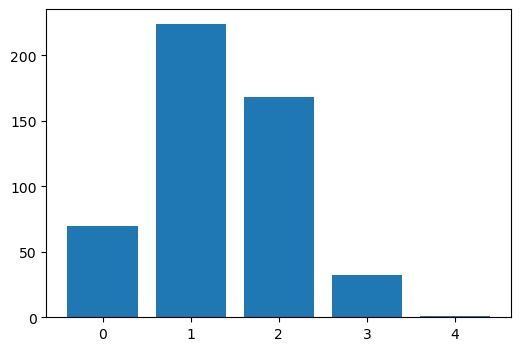

In [33]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

In [21]:
# The probability of getting all four correct by chance is 1 in 495.
1/n_ways

0.00202020202020202

In [35]:
# the probability of getting three or more correct by chance is
(1 + 33) / 495

0.06868686868686869

In [ ]:


# Permutations
import itertools

#Random  selections
import random

#Numberical structures and operations
import numpy as np

#Plotting
import matplotlib.pyplot as plt





Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

## Problem 2: Normal Distribution

'''Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.'''

[Normal distribution](https://www.geeksforgeeks.org/maths/normal-distribution/) is the most common distribution of data variables. Normal  

## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference 
d=0,0.1,0.2,…,1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.
Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.



## Problem 4: ANOVA
Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
Compare the conclusions.
3. Write a short note on why ANOVA is preferred over running several t-tests.

## End